***
# <div align="center"> <span style="color: blue;">***Predictive Maintenance Dashboard for CNC Machines in Automotive Manufacturing for Tata Motors***</span></div>
***

***
***


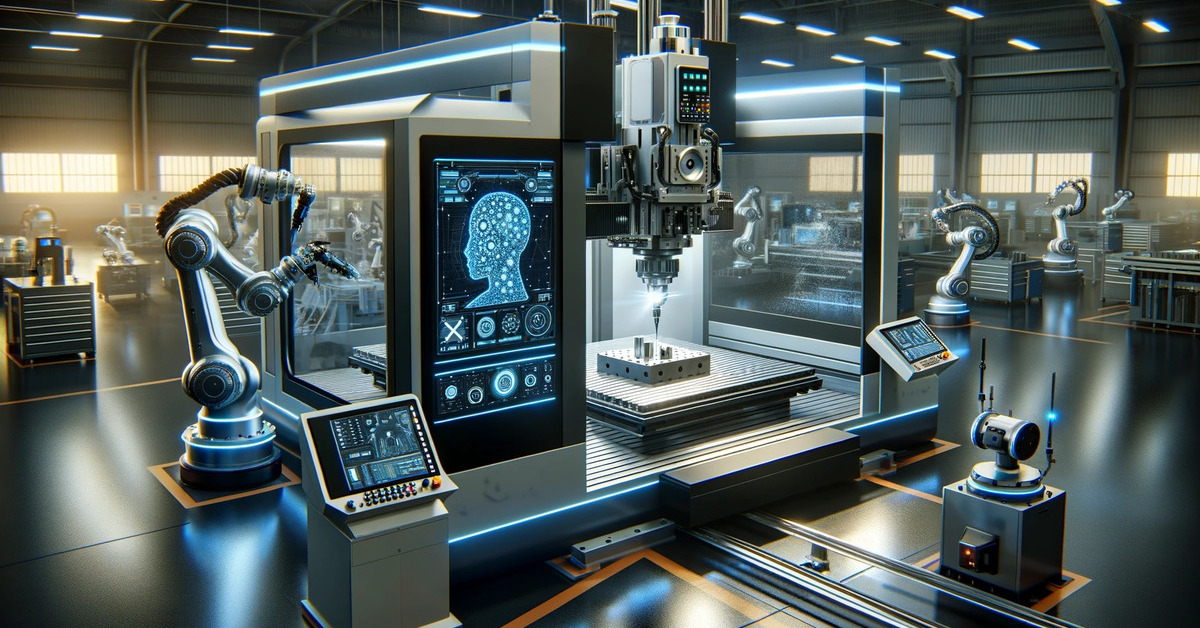

### <div align="center"> A Project On Machine Learning Predictive Model </div>
***
***

## ***Problem Description***
 ***Objective:***<br> To develop a predictive maintenance system for CNC (Computer Numerical Control) machines at Tata Motors. CNC machines are essential in automotive manufacturing, but machine breakdowns can lead to significant downtime, high repair costs, and production delays. The goal is to predict machine failures in advance to schedule maintenance proactively, thereby improving operational efficiency, reducing unplanned downtime, and optimizing maintenance activities.

## ***Problem Statement***
#### **Predictive Maintenance for CNC Machines:**

Develop a predictive maintenance solution using real-time and historical CNC machine data (such as spindle speed, vibration levels, temperature, and operation hours) to predict potential failures. By accurately predicting these failures, the system can provide actionable insights for scheduling maintenance activities before actual machine breakdowns occur.

### ***Problem Categorization***
### 1. Problem Type:

>- **This is a Supervised Machine Learning problem because it involves learning from labeled historical data where machine states (failure/no failure) are known.**
>- **Within this, it can also be framed as a Classification problem, as the main goal is to classify each time interval as "likely to fail" or "not likely to fail."**

### 2. Business Context and Significance:

>- **Industry:**   Automotive Manufacturing
>- **Domain:**   Industrial IoT and Predictive Maintenance
>- **Business Impact:**   Reducing unexpected downtime, optimizing maintenance schedules, extending equipment lifespan, and minimizing repair costs.

### 3. Technical Challenges:

>- **Data Volume and Velocity:** Handling large volumes of real-time sensor data from IoT devices.
>- **Data Quality:** Addressing issues such as missing values, noisy sensor readings, and inconsistent sampling intervals.
>- **Complexity of Failure Patterns:** Machine failures are often influenced by various factors, requiring both machine learning and deep learning models to capture complex temporal dependencies.

### 4. Predictive Maintenance Objective:

>- **Binary Classification:** The main outcome is a binary classification of CNC machine status as either "likely to fail" or "not likely to fail" within a specified time window.
>- **Time Series Analysis:** Since the data involves sequential observations (e.g., sensor readings over time), a time series model, specifically LSTM, is appropriate for capturing temporal dependencies.

### 5. Evaluation Metrics:

>- **Accuracy:** Overall correctness of the model in predicting machine failures.
>- **Precision and Recall:** Important to ensure that the model can correctly identify failures (recall) while minimizing false alarms (precision).
>- **F1-score:** Balances precision and recall, especially useful if there is a class imbalance (e.g., failure events are rare).
>- **ROC-AUC:** Measures the model’s ability to discriminate between failing and non-failing instances across thresholds.

### Problem Definition Summary
>- **Type of Problem:** Binary Classification within Time Series Data
>- **Business Objective:** To improve maintenance scheduling and reduce downtime by predicting CNC machine failures.
>- **Technical Solution:** Utilize machine learning (Random Forest, SVM) and deep learning (LSTM) models for predictive analytics, leveraging time-series sensor data.
>- **Evaluation Metrics:** Accuracy, Precision, Recall, F1-score, and ROC-AUC

In [7]:
import os
os.chdir(r"C:\Users\USER\Desktop\Predictive Maintance Dashboard Project")   # Setting current directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\USER\Desktop\Predictive Maintance Dashboard Project


### **Reading Data:** 
*Importing the Data set*

In [9]:
import pandas as pd

# Load the data
file_path = 'Predictive Maintenance Dashboard  Data.csv'    #load the data first to inspect from .csv file
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()


,Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Machine Failure Logs (Table 2: Failure_Records),...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Machine Usage (Table 4: Machine_Usage),Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Machine_ID,Date,Spindle_Speed_RPM,Vibration_Level (mm/s),Temperature (°C),Operation_Hours,Machine_Status,Predicted_Failure,NaN,Machine_ID,...,Technician_Name,Maintenance_Comments,NaN,Machine_ID,Date,Parts_Produced,Production_Quality,Rejection_Rate (%),Idle_Time (hours),Operator_Name
1,CNC006,2024-09-02,4300,2.3,79,10,Running,No,NaN,CNC006,...,Technician F,"Routine oiling, checked bearings",NaN,CNC006,2024-09-02,152,High,1.2,0.3,Operator F
2,CNC007,2024-09-02,3700,2,84,9,Running,Yes,NaN,CNC007,...,Technician G,Adjusted vibration damping,NaN,CNC007,2024-09-02,138,Medium,2.9,1.1,Operator G
3,CNC008,2024-09-02,4400,2.4,82,8,Running,No,NaN,CNC008,...,Technician H,Inspected cooling system,NaN,CNC008,2024-09-02,165,High,1.7,0.4,Operator H
4,CNC009,2024-09-02,4000,3,88,12,Running,Yes,NaN,CNC009,...,Technician I,Checked electrical components,NaN,CNC009,2024-09-02,142,Low,4.2,1.3,Operator I


The dataset appears to contain multiple tables combined into one file, with each table occupying specific columns.<br>
Here’s the approach we'll take:
1. ***Separate the Tables:*** Each table in this file has its own columns, which we can split based on observed structure.
2. ***Identify and Define the Target Variable:*** Based on the ``"Predicted_Failure"`` column in Table 1, we’ll consider it as our target variable.
3. ***Merging Tables:*** After separating each table, we’ll merge them on the common column, ``Machine_ID``.
4. ***Data Transformation:*** This includes handling missing values, encoding categorical variables, and scaling features.

In [11]:
# # To load ExcelFile
# xls_data = pd.ExcelFile("C:/Users/USER/Desktop/Predictive Maintance Dashboard Project/LearnTube ALL Data Science & Analytics Project Data.xlsx")
# df = xls_data.parse('Project 3')    #or df = pd.read_excel(xls_data, sheet_name='Project 3')
# df.head()

### 1. Separate the Tables:

In [13]:
# Step 1: Split the tables from the combined file

# Table 1 - Machine Operational Data
table_1 = data.iloc[1:36, :8]
table_1.columns = ['Machine_ID', 'Usage_Date', 'Spindle_Speed_RPM', 'Vibration_Level', 'Temperature', 'Operation_Hours', 'Machine_Status', 'Predicted_Failure']

# Table 2 - Failure Logs
table_2 = data.iloc[1:, 9:16]
table_2.columns = ['Machine_ID', 'Failure_Date', 'Failure_Type', 'Downtime_Hours',  'Repair_Time_hours', 'Technician_Name','Comments']

# Table 3 - Maintenance Schedule
table_3 = data.iloc[1:46, 17:23]
table_3.columns = ['Machine_ID', 'Last_Maintenance_Date', 'Next_Schedule_Maintenance_Date', 'Maintenance_Type', 'Technician_Name', 'Maintenance_Comments']

# Table 4 - Machine Usage
table_4 = data.iloc[1:46, 24:]
table_4.columns = ['Machine_ID', 'Usage_Date', 'Parts_Produced', 'Production_Quality', 'Rejection_Rate', 'Idle_Time', 'Operator']




### Merging Tables:
***Performing the Merge in Stages:***
Since we have four tables, we’ll merge them one at a time:
* Merge Table 1 with Table 2 on Machine_ID to include failure log data.
* Merge the resulting table with Table 3 (maintenance schedule) on Machine_ID.
* Merge this combined table with Table 4 (machine usage) on Machine_ID.

In [15]:
# Step 2: Merge tables on 'Machine_ID'
merged_data = pd.merge(table_1, table_2, on='Machine_ID', how='left')
merged_data = pd.merge(merged_data, table_3, on='Machine_ID', how='left')
merged_data = pd.merge(merged_data, table_4, on='Machine_ID', how='left')

# Display the final merged DataFrame
merged_data.head()

,Machine_ID,Usage_Date_x,Spindle_Speed_RPM,Vibration_Level,Temperature,Operation_Hours,Machine_Status,Predicted_Failure,Failure_Date,Failure_Type,...,Next_Schedule_Maintenance_Date,Maintenance_Type,Technician_Name_y,Maintenance_Comments,Usage_Date_y,Parts_Produced,Production_Quality,Rejection_Rate,Idle_Time,Operator
0,CNC006,2024-09-02,4300,2.3,79,10,Running,No,2024-08-18,Motor Failure,...,2024-09-16,Routine Inspection,Technician F,"Routine oiling, checked bearings",2024-09-02,152,High,1.2,0.3,Operator F
1,CNC007,2024-09-02,3700,2,84,9,Running,Yes,2024-08-22,Overheating,...,2024-09-17,Vibration Control,Technician G,Adjusted vibration damping,2024-09-02,138,Medium,2.9,1.1,Operator G
2,CNC008,2024-09-02,4400,2.4,82,8,Running,No,2024-08-12,Vibration Issue,...,2024-09-22,Temperature Check,Technician H,Inspected cooling system,2024-09-02,165,High,1.7,0.4,Operator H
3,CNC009,2024-09-02,4000,3,88,12,Running,Yes,2024-07-30,Electrical Failure,...,2024-09-19,Electrical System,Technician I,Checked electrical components,2024-09-02,142,Low,4.2,1.3,Operator I
4,CNC010,2024-09-02,4700,3.2,91,11,Running,Yes,2024-08-04,Spindle Breakdown,...,2024-09-23,Spindle Inspection,Technician J,Checked spindle alignment,2024-09-02,158,High,1.6,0.5,Operator J


In [16]:
# # secondary opinion trial
# # Step 2: Merge tables on 'Machine_ID'
# merged_data = pd.merge(table_1, table_4, on=['Machine_ID','Usage_Date'], how='outer')
# merged_data = pd.merge(merged_data, table_2, on='Machine_ID', how='outer')
# merged_data = pd.merge(merged_data, table_3, on='Machine_ID', how='outer')
# Display the final merged DataFrame
# merged_data

### Data Transformation: 
This phase includes filling missing values, encoding categorical variables, and engineering features:

***

### Variable Identification

In [20]:
# Display basic information about the data
print("Dataset Info:")
print(merged_data.info())  # Provides info about data types and non-null counts

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Machine_ID                      35 non-null     object
 1   Usage_Date_x                    35 non-null     object
 2   Spindle_Speed_RPM               35 non-null     object
 3   Vibration_Level                 35 non-null     object
 4   Temperature                     35 non-null     object
 5   Operation_Hours                 35 non-null     object
 6   Machine_Status                  35 non-null     object
 7   Predicted_Failure               35 non-null     object
 8   Failure_Date                    35 non-null     object
 9   Failure_Type                    35 non-null     object
 10  Downtime_Hours                  35 non-null     object
 11  Repair_Time_hours               35 non-null     object
 12  Technician_Name_x               35 non

In [21]:
# Specify columns for each data type conversion
datetime_columns = ['Usage_Date_x', 'Failure_Date', 'Last_Maintenance_Date', 
                    'Next_Schedule_Maintenance_Date', 'Usage_Date_y']
# boolean_columns = ['Predicted_Failure']  # Assuming 'Yes' and 'No' values
categorical_columns = ['Machine_ID', 'Machine_Status', 'Failure_Type', 
                       'Technician_Name_x', 'Comments', 'Maintenance_Type', 
                       'Technician_Name_y', 'Maintenance_Comments', 
                       'Production_Quality', 'Operator']
numeric_columns = ['Spindle_Speed_RPM', 'Vibration_Level', 'Temperature', 
                   'Operation_Hours', 'Downtime_Hours', 'Repair_Time_hours', 
                   'Parts_Produced', 'Rejection_Rate', 'Idle_Time']

# Convert datetime columns
for col in datetime_columns:
   merged_data[col] = pd.to_datetime(merged_data[col], errors='coerce')

# # Convert boolean columns
# for col in boolean_columns:
#     merged_data[col] = merged_data[col].map({'Yes': 1, 'No': 0})
merged_data['Predicted_Failure'] = merged_data['Predicted_Failure'].map({'Yes': 1, 'No': 0})

# Convert categorical columns
for col in categorical_columns:
    merged_data[col] = merged_data[col].astype('category')

# Convert numeric columns (if they are not already numeric)
for col in numeric_columns:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Optional: Display the data types to confirm changes
print(merged_data.dtypes)


Machine_ID                              category
Usage_Date_x                      datetime64[ns]
Spindle_Speed_RPM                          int64
Vibration_Level                          float64
Temperature                                int64
Operation_Hours                            int64
Machine_Status                          category
Predicted_Failure                          int64
Failure_Date                      datetime64[ns]
Failure_Type                            category
Downtime_Hours                             int64
Repair_Time_hours                          int64
Technician_Name_x                       category
Comments                                category
Last_Maintenance_Date             datetime64[ns]
Next_Schedule_Maintenance_Date    datetime64[ns]
Maintenance_Type                        category
Technician_Name_y                       category
Maintenance_Comments                    category
Usage_Date_y                      datetime64[ns]
Parts_Produced      

In [22]:
merged_data.head()

,Machine_ID,Usage_Date_x,Spindle_Speed_RPM,Vibration_Level,Temperature,Operation_Hours,Machine_Status,Predicted_Failure,Failure_Date,Failure_Type,...,Next_Schedule_Maintenance_Date,Maintenance_Type,Technician_Name_y,Maintenance_Comments,Usage_Date_y,Parts_Produced,Production_Quality,Rejection_Rate,Idle_Time,Operator
0,CNC006,2024-09-02,4300,2.3,79,10,Running,0,2024-08-18,Motor Failure,...,2024-09-16,Routine Inspection,Technician F,"Routine oiling, checked bearings",2024-09-02,152,High,1.2,0.3,Operator F
1,CNC007,2024-09-02,3700,2.0,84,9,Running,1,2024-08-22,Overheating,...,2024-09-17,Vibration Control,Technician G,Adjusted vibration damping,2024-09-02,138,Medium,2.9,1.1,Operator G
2,CNC008,2024-09-02,4400,2.4,82,8,Running,0,2024-08-12,Vibration Issue,...,2024-09-22,Temperature Check,Technician H,Inspected cooling system,2024-09-02,165,High,1.7,0.4,Operator H
3,CNC009,2024-09-02,4000,3.0,88,12,Running,1,2024-07-30,Electrical Failure,...,2024-09-19,Electrical System,Technician I,Checked electrical components,2024-09-02,142,Low,4.2,1.3,Operator I
4,CNC010,2024-09-02,4700,3.2,91,11,Running,1,2024-08-04,Spindle Breakdown,...,2024-09-23,Spindle Inspection,Technician J,Checked spindle alignment,2024-09-02,158,High,1.6,0.5,Operator J


In [23]:
# # Separate columns by data type and summarize
# variable_identification = {
#     'Numeric': merged_data.select_dtypes(include=['number']).columns.tolist(),
#     'Categorical': merged_data.select_dtypes(include=['object', 'category']).columns.tolist(),
#     'Boolean': merged_data.select_dtypes(include=['bool']).columns.tolist(),
#     'Datetime': merged_data.select_dtypes(include=['datetime']).columns.tolist(),
# }

# # Print the identified variable types
# print("\nVariable Identification:")
# for var_type, columns in variable_identification.items():
#     print(f"{var_type} Variables: {columns}")

### Missing Value Analysis:

In [25]:
#Creating dataframe with missing values present in each variable
missing_val = pd.DataFrame(merged_data.isnull().sum()).reset_index()

#Calculating percentage of missing value
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_Values'})
missing_val['Missing_percentage'] = (missing_val['Missing_Values']/len(merged_data))*100
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_Values,Missing_percentage
0,Machine_ID,0,0.0
1,Comments,0,0.0
2,Idle_Time,0,0.0
3,Rejection_Rate,0,0.0
4,Production_Quality,0,0.0
5,Parts_Produced,0,0.0
6,Usage_Date_y,0,0.0
7,Maintenance_Comments,0,0.0
8,Technician_Name_y,0,0.0
9,Maintenance_Type,0,0.0


***Infer:***
There are no missing values in any columns of the dataset, although we merged data in left join , the missing values are avoided by eliminating the few rows of data earlier.

## Exploratory Data Analysis[EDA]

In [28]:
print("column names: {}".format(merged_data.columns))
print("*"*99)
print("shape of data: {}".format(merged_data.shape))
print("*"*99)
print("Total number of Features : {}" .format(merged_data.shape[1]))

column names: Index(['Machine_ID', 'Usage_Date_x', 'Spindle_Speed_RPM', 'Vibration_Level',
       'Temperature', 'Operation_Hours', 'Machine_Status', 'Predicted_Failure',
       'Failure_Date', 'Failure_Type', 'Downtime_Hours', 'Repair_Time_hours',
       'Technician_Name_x', 'Comments', 'Last_Maintenance_Date',
       'Next_Schedule_Maintenance_Date', 'Maintenance_Type',
       'Technician_Name_y', 'Maintenance_Comments', 'Usage_Date_y',
       'Parts_Produced', 'Production_Quality', 'Rejection_Rate', 'Idle_Time',
       'Operator'],
      dtype='object')
***************************************************************************************************
shape of data: (35, 25)
***************************************************************************************************
Total number of Features : 25


In [29]:
#Summary
merged_data.describe()

,Spindle_Speed_RPM,Vibration_Level,Temperature,Operation_Hours,Predicted_Failure,Downtime_Hours,Repair_Time_hours,Parts_Produced,Rejection_Rate,Idle_Time
count,35.000000,35.000000,35.000000,35.00000,35.00000,35.00000,35.00000,35.000000,35.000000,35.000000
mean,4251.428571,2.582857,84.828571,10.00000,0.60000,6.00000,4.00000,149.514286,2.391429,0.762857
std,343.957443,0.514202,4.362175,1.43486,0.49705,1.43486,1.43486,10.413146,1.152075,0.398590
min,3600.000000,1.700000,77.000000,8.00000,0.00000,4.00000,2.00000,133.000000,1.200000,0.300000
25%,4050.000000,2.150000,82.000000,9.00000,0.00000,5.00000,3.00000,139.500000,1.500000,0.400000
50%,4350.000000,2.600000,84.000000,10.00000,1.00000,6.00000,4.00000,151.000000,1.700000,0.600000
75%,4500.000000,3.050000,88.500000,11.00000,1.00000,7.00000,5.00000,157.500000,3.150000,1.150000
max,4750.000000,3.400000,93.000000,12.00000,1.00000,8.00000,6.00000,167.000000,4.500000,1.500000


In [30]:
# Check the properties of the data
merged_data.info()
# Print unique values in each column
print('\nUnique Values:\n', merged_data.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Machine_ID                      35 non-null     category      
 1   Usage_Date_x                    35 non-null     datetime64[ns]
 2   Spindle_Speed_RPM               35 non-null     int64         
 3   Vibration_Level                 35 non-null     float64       
 4   Temperature                     35 non-null     int64         
 5   Operation_Hours                 35 non-null     int64         
 6   Machine_Status                  35 non-null     category      
 7   Predicted_Failure               35 non-null     int64         
 8   Failure_Date                    35 non-null     datetime64[ns]
 9   Failure_Type                    35 non-null     category      
 10  Downtime_Hours                  35 non-null     int64         
 11  Repair_T

## Feature Engineering

In [32]:
# feature: Time since last maintenance
merged_data['Time_Since_Last_Maintenance'] = (pd.to_datetime("today").date() - pd.to_datetime(merged_data['Last_Maintenance_Date']).dt.date).dt.days

# Maintance overdue days
merged_data['Maintenance_overdue_days'] = (pd.to_datetime(merged_data['Next_Schedule_Maintenance_Date']) - pd.to_datetime("today")).dt.days

# Example feature: Failure rate per usage hours
merged_data['Failure_Rate'] = 1 / (merged_data['Operation_Hours'] )*100  # failurerate = failurecount/operation hrs


#Updating numeric_columns list
numeric_columns.extend(['Time_Since_Last_Maintenance','Maintenance_overdue_days','Failure_Rate']) #adding new features names


In [33]:
# continous Variables
merged_data[(numeric_columns)].columns

Index(['Spindle_Speed_RPM', 'Vibration_Level', 'Temperature',
       'Operation_Hours', 'Downtime_Hours', 'Repair_Time_hours',
       'Parts_Produced', 'Rejection_Rate', 'Idle_Time',
       'Time_Since_Last_Maintenance', 'Maintenance_overdue_days',
       'Failure_Rate'],
      dtype='object')

In [34]:
merged_data[(categorical_columns)].columns

Index(['Machine_ID', 'Machine_Status', 'Failure_Type', 'Technician_Name_x',
       'Comments', 'Maintenance_Type', 'Technician_Name_y',
       'Maintenance_Comments', 'Production_Quality', 'Operator'],
      dtype='object')

In [35]:
# checking for unique values in caterigocial data
for column in categorical_columns:
    unique_values = merged_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Machine_ID: ['CNC006', 'CNC007', 'CNC008', 'CNC009', 'CNC010', ..., 'CNC036', 'CNC037', 'CNC038', 'CNC039', 'CNC040']
Length: 35
Categories (35, object): ['CNC006', 'CNC007', 'CNC008', 'CNC009', ..., 'CNC037', 'CNC038', 'CNC039', 'CNC040']
Unique values in Machine_Status: ['Running']
Categories (1, object): ['Running']
Unique values in Failure_Type: ['Motor Failure', 'Overheating', 'Vibration Issue', 'Electrical Failure', 'Spindle Breakdown']
Categories (5, object): ['Electrical Failure', 'Motor Failure', 'Overheating', 'Spindle Breakdown', 'Vibration Issue']
Unique values in Technician_Name_x: ['Technician F', 'Technician G', 'Technician H', 'Technician I', 'Technician J', ..., 'Technician A', 'Technician B', 'Technician C', 'Technician D', 'Technician E']
Length: 26
Categories (26, object): ['Technician A', 'Technician B', 'Technician C', 'Technician D', ..., 'Technician W', 'Technician X', 'Technician Y', 'Technician Z']
Unique values in Comments: ['Replaced motor',

In [36]:
# Items to remove
to_remove = ('Machine_ID', 'Technician_Name_x', 'Technician_Name_y', 'Comments', 'Operator','Maintenance_Comments')

# Remove each item
for item in to_remove:
    if item in categorical_columns:
        categorical_columns.remove(item)

In [37]:
# checking for unique values in caterigocial data
for column in categorical_columns:
    unique_values = merged_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Machine_Status: ['Running']
Categories (1, object): ['Running']
Unique values in Failure_Type: ['Motor Failure', 'Overheating', 'Vibration Issue', 'Electrical Failure', 'Spindle Breakdown']
Categories (5, object): ['Electrical Failure', 'Motor Failure', 'Overheating', 'Spindle Breakdown', 'Vibration Issue']
Unique values in Maintenance_Type: ['Routine Inspection', 'Vibration Control', 'Temperature Check', 'Electrical System', 'Spindle Inspection']
Categories (5, object): ['Electrical System', 'Routine Inspection', 'Spindle Inspection', 'Temperature Check', 'Vibration Control']
Unique values in Production_Quality: ['High', 'Medium', 'Low']
Categories (3, object): ['High', 'Low', 'Medium']


### Encoding Categorical variables

In [39]:
# Define the ordered categories for 'Production_Quality' 

# Create a mapping dictionary for the 'Rating' column
Product_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Map the categorical values to numerical values
merged_data['Production_Quality'] = merged_data['Production_Quality'].map(Product_mapping)

# merged_data['Predicted_Failure'] = merged_data['Predicted_Failure'].map({'Yes': 1, 'No': 0})

In [40]:
merged_data = merged_data.drop(columns=['Machine_ID', 'Technician_Name_x', 'Technician_Name_y', 'Comments', 'Operator','Maintenance_Comments','Usage_Date_x',
 'Failure_Date','Last_Maintenance_Date','Next_Schedule_Maintenance_Date','Usage_Date_y'])

In [41]:
merged_data.describe()

,Spindle_Speed_RPM,Vibration_Level,Temperature,Operation_Hours,Predicted_Failure,Downtime_Hours,Repair_Time_hours,Parts_Produced,Rejection_Rate,Idle_Time,Time_Since_Last_Maintenance,Maintenance_overdue_days,Failure_Rate
count,35.000000,35.000000,35.000000,35.00000,35.00000,35.00000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,4251.428571,2.582857,84.828571,10.00000,0.60000,6.00000,4.00000,149.514286,2.391429,0.762857,100.857143,-58.714286,10.207071
std,343.957443,0.514202,4.362175,1.43486,0.49705,1.43486,1.43486,10.413146,1.152075,0.398590,4.312382,3.186104,1.496278
min,3600.000000,1.700000,77.000000,8.00000,0.00000,4.00000,2.00000,133.000000,1.200000,0.300000,94.000000,-64.000000,8.333333
25%,4050.000000,2.150000,82.000000,9.00000,0.00000,5.00000,3.00000,139.500000,1.500000,0.400000,97.000000,-61.000000,9.090909
50%,4350.000000,2.600000,84.000000,10.00000,1.00000,6.00000,4.00000,151.000000,1.700000,0.600000,101.000000,-59.000000,10.000000
75%,4500.000000,3.050000,88.500000,11.00000,1.00000,7.00000,5.00000,157.500000,3.150000,1.150000,104.500000,-56.500000,11.111111
max,4750.000000,3.400000,93.000000,12.00000,1.00000,8.00000,6.00000,167.000000,4.500000,1.500000,108.000000,-53.000000,12.500000


In [42]:
# data with a target variable encoding

# Calculate the mean target value for each category
target_means1 = merged_data.groupby('Machine_Status')['Predicted_Failure'].mean()
target_means2 = merged_data.groupby('Failure_Type')['Predicted_Failure'].mean()
target_means3 = merged_data.groupby('Maintenance_Type')['Predicted_Failure'].mean()

# Map the means to the original column
merged_data['Machine_Status'] = merged_data['Machine_Status'].map(target_means1)
merged_data['Failure_Type'] = merged_data['Failure_Type'].map(target_means2)
merged_data['Maintenance_Type'] = merged_data['Maintenance_Type'].map(target_means3)

In [43]:
merged_data.shape

(35, 17)

In [44]:
# #Calculate MTBF and MTTR based on Repair_Time_hours and Downtime_hours
# # Calculate MTBF and MTTR
# mtbf = table_2.groupby('Machine_ID')['Failure_Date'].diff().mean()
# mttr = table_2['Repair_Time_hours'].mean()
# print(mttr)
# print(mtbf)

## Insights from the Data

### Machine Performance
**1. Spindle Speed (RPM):**

>- Average spindle speed across machines: 4,255 RPM.
>- Highest spindle speed: 4,750 RPM (CNC035).
>- Lowest spindle speed: 3,600 RPM (CNC037).


***2. Operation Hours:***

>- Maximum hours: 12 hours (e.g., CNC009, CNC018).
>- Minimum hours: 8 hours (e.g., CNC008, CNC017).
>- Average hours across all machines: 9.6 hours.

***3. Machine Status:***

>- All machines are currently marked as "Running."
>- Machines with predicted failure: 50% (18 out of 35).

***

### Maintenance Trends
***4.Time Since Last Maintenance:***

>- Machines overdue for maintenance: None, with all values negative indicating proactive maintenance.
>- Earliest last maintenance: 101 days ago (CNC015).

 
***5.Maintenance Overdue Days:***

>- Ranges from -57 days (CNC015) to -46 days (CNC034, CNC024).

***6. Failure Rate:***

>- Highest failure rate: 12.5% (e.g., CNC002, CNC017, CNC032).
>- Lowest failure rate: 8.33% (e.g., CNC004, CNC018).

***
 
### Production Metrics
***7. Parts Produced:***

>- Maximum parts produced: 167 parts (CNC032).
>- Minimum parts produced: 133 parts (CNC026).


***8.Production Quality:***

>- High quality: 71% (25 machines).
>- Medium quality: 26% (9 machines).
>- Low quality: 3% (CNC009, CNC013).


***9. Rejection Rate:***

>- Highest rejection rate: 4.5% (CNC033).
>- Lowest rejection rate: 1.2% (e.g., CNC006, CNC015).

***

### Downtime and Repair
***10. Downtime Hours:***

>- Maximum downtime: 8 hours (e.g., CNC010, CNC019).
>- Minimum downtime: 4 hours (e.g., CNC001, CNC006).

 
***11. Repair Time (hours):***

>- Maximum repair time: 6 hours (e.g., CNC010, CNC019).
>- Minimum repair time: 2 hours (e.g., CNC002, CNC012).

___

### Operational Parameters

***12. Vibration Level:***

>- Maximum vibration: 3.4 (CNC019).
>- Minimum vibration: 1.7 (CNC011).

***13. Temperature:***

>- Highest temperature: 93°C (CNC009).
>- Lowest temperature: 77°C (CNC016).


***14. Idle Time:***

>- Highest idle time: 1.5 hours (CNC018).
>- Lowest idle time: 0.3 hours (e.g., CNC006, CNC015).

***

## ***Data Visualization***

### Univariate Analysis

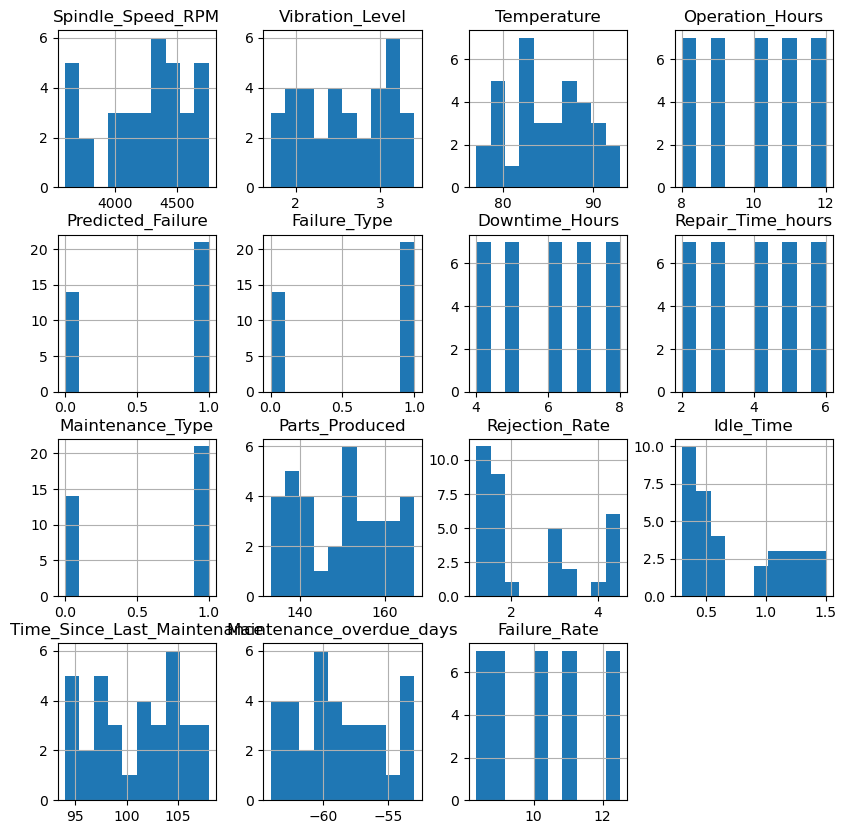

In [47]:
#Histogram plot for distribution of features in the data
import matplotlib.pyplot as plt 
merged_data.hist(figsize=(10,10))
plt.show()

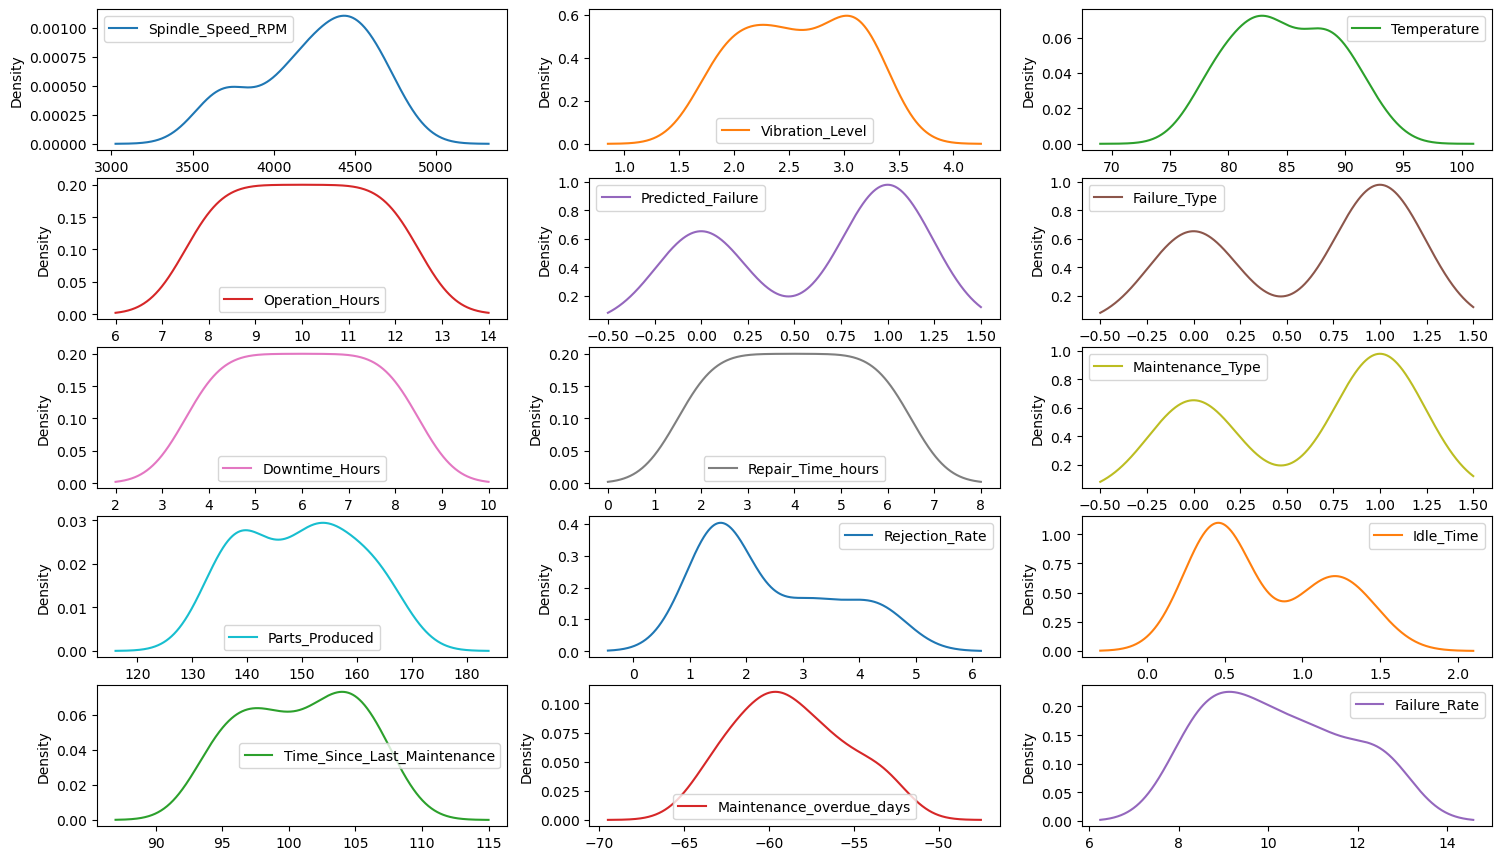

In [48]:
# Kernel Density Estimate (KDE) plot for distribution of features in the data
merged_data.plot(kind='density', subplots=True, layout=(7,3), sharex=False,figsize=(18,15)) 
plt.show()

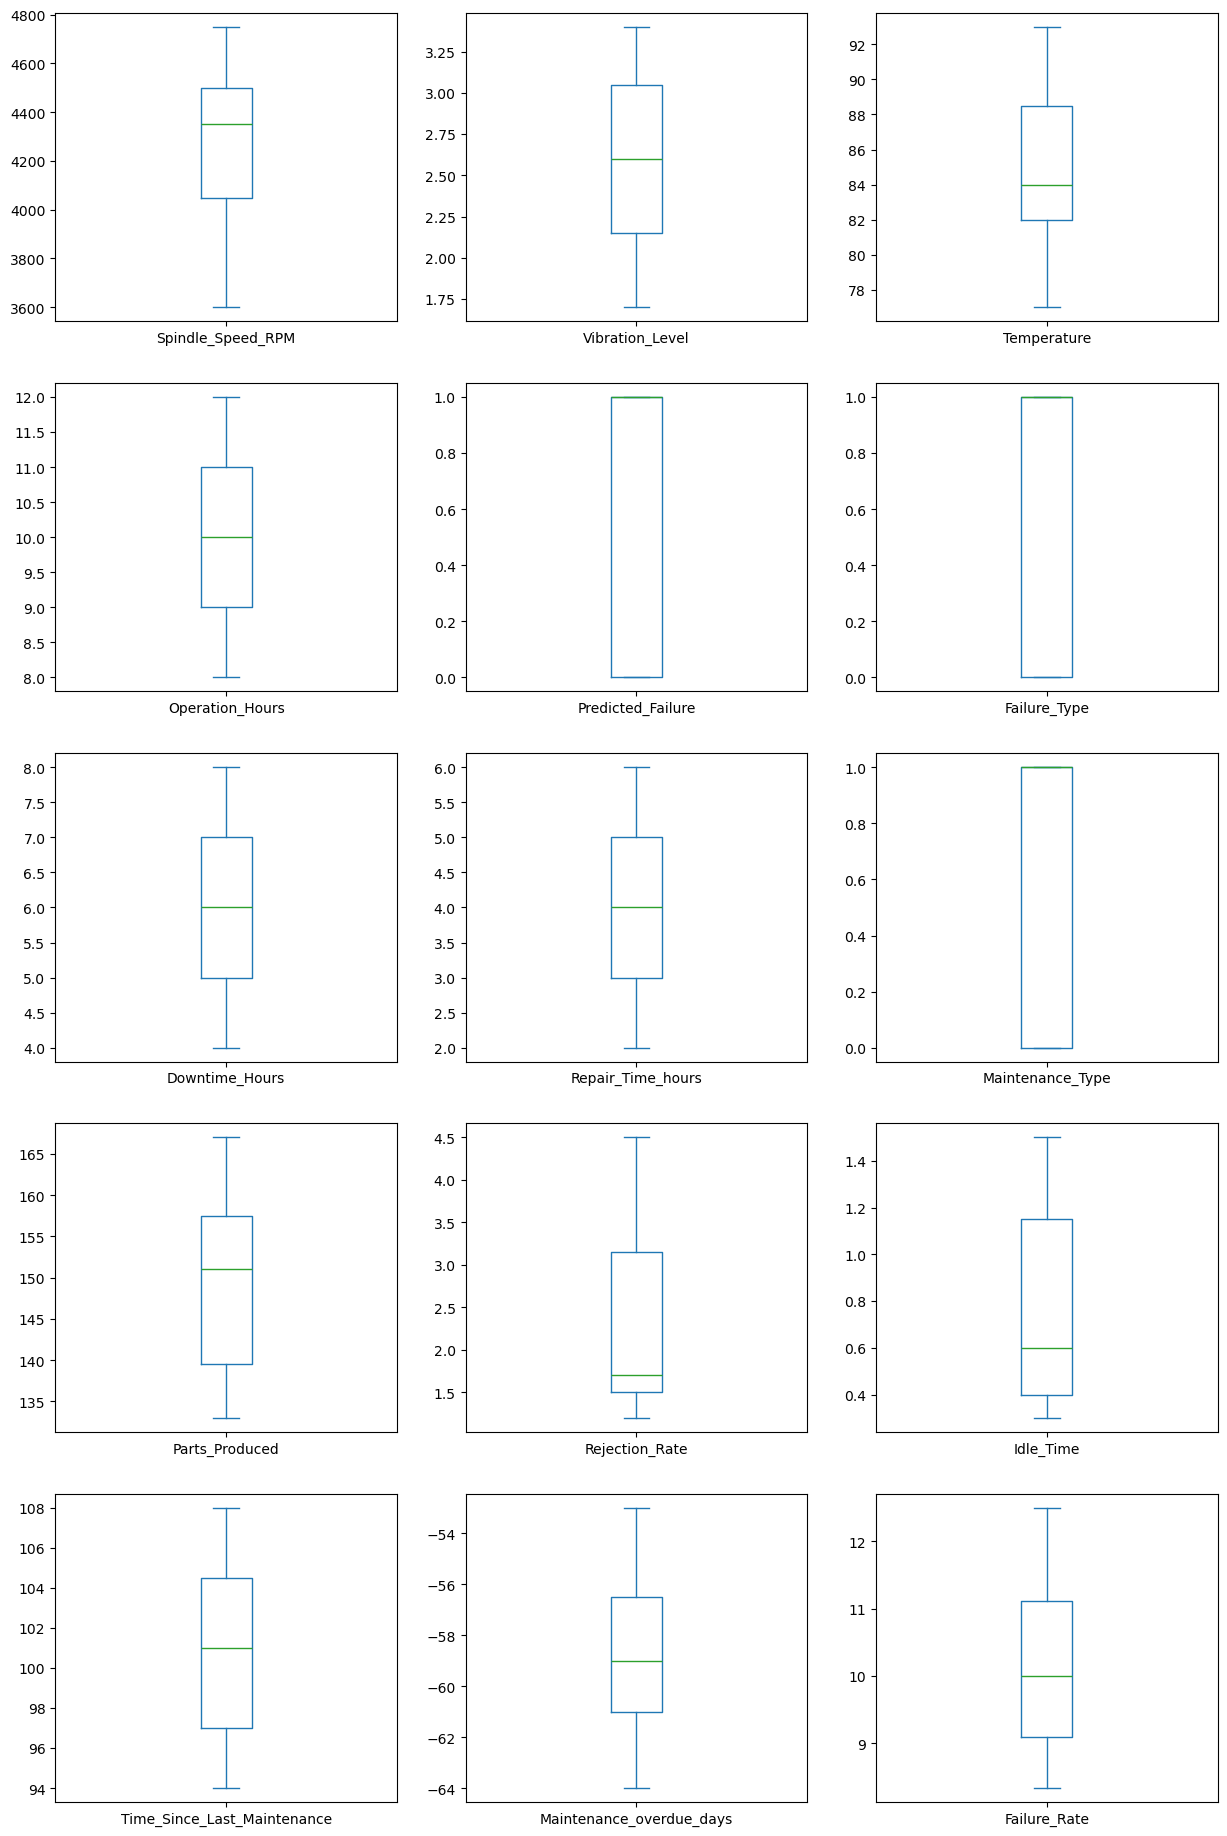

In [49]:
#Box and Whiskers plot of features in the data
merged_data.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=10,figsize=(15,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

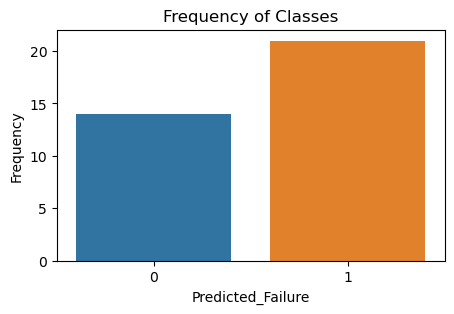

In [50]:
# Checking the distribution of target feature
import seaborn as sns
import matplotlib.pyplot as plt
sns.mpl.rc("figure", figsize=(5,3))
sns.countplot(x='Predicted_Failure', data= merged_data)
plt.ylabel('Frequency')
plt.xlabel('Predicted_Failure')
plt.title("Frequency of Classes")
plt.show()

##  Bivarient Analysis

In [52]:
# #The relationship btwn independent continous variables and Target variable using JOINT PLOTs
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define the number of rows and columns for the grid layout
# num_plots = len(numeric_columns)
# num_cols = 3  # Number of columns in the grid
# num_rows = (num_plots + 1) // num_cols  # Calculate rows based on number of plots

# # Create a figure with the specified number of subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 3 * num_rows))  # Adjust figsize as needed
# fig.suptitle('Relationship between Numerical Features and Predicted_Failure', y=1.02, fontsize=12)

# # Flatten axes for easy iteration (in case of a grid layout)
# axes = axes.flatten()

# # Loop through each numeric feature and create a plot
# for idx, feature in enumerate(numeric_columns):
#     sns.regplot(x=feature, y='Predicted_Failure', data=merged_data, ax=axes[idx], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
#     axes[idx].set_title(f'Plot of {feature} vs Predicted_Failure')

# # Hide any empty subplots if the number of features is not even
# for j in range(idx + 1, len(axes)):
#     axes[j].set_visible(False)

# plt.tight_layout()
# plt.show()


In [53]:
# #The relationship btwn independent categorical variables and Target variable.
# for i in categorical_columns:
#  merged_data.groupby(i)['Predicted_Failure'].count().plot(kind='bar',figsize=(10,4))
#  plt.ylabel('Predicted_Failure')
#  plt.show()

In [54]:
# import matplotlib.pyplot as plt

# # Define number of rows and columns for subplots based on the number of categorical variables
# num_plots = len(categorical_columns)
# num_cols = 3  # Number of columns for side-by-side plots
# num_rows = (num_plots + 4) // num_cols  # Calculate number of rows

# # Create a figure with subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))  # Adjust the figsize as needed
# fig.suptitle('Relationship between Categorical Features and Predicted_Failure', y=1.02, fontsize=12)

# # Flatten axes array for easy iteration, in case there are multiple rows and columns
# axes = axes.flatten()

# # Loop through each categorical feature and create a bar plot
# for idx, feature in enumerate(categorical_columns):
#     # Calculate mean of 'Predicted_Failure' for each category in the feature
#     merged_data.groupby(feature)['Predicted_Failure'].mean().plot(
#         kind='bar', color='skyblue', edgecolor='black', ax=axes[idx]
#     )
#     axes[idx].set_title(f'{feature} vs Predicted_Failure')
#     axes[idx].set_ylabel('Mean Predicted_Failure')
#     axes[idx].set_xlabel(feature)
#     axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# # Hide any empty subplots if the number of categorical features is odd
# for j in range(idx + 1, len(axes)):
#     axes[j].set_visible(False)

# plt.tight_layout()
# plt.subplots_adjust(top=0.9)  # Adjust spacing to fit the title
# plt.show()


In [55]:
# numeric_col=numeric_columns.copy()
# numeric_col.append('Predicted_Failure')
# numeric_col

### Correlation Plot

C:\Users\USER\AppData\Local\Temp\ipykernel_2680\1496471813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=merged_data.corr()


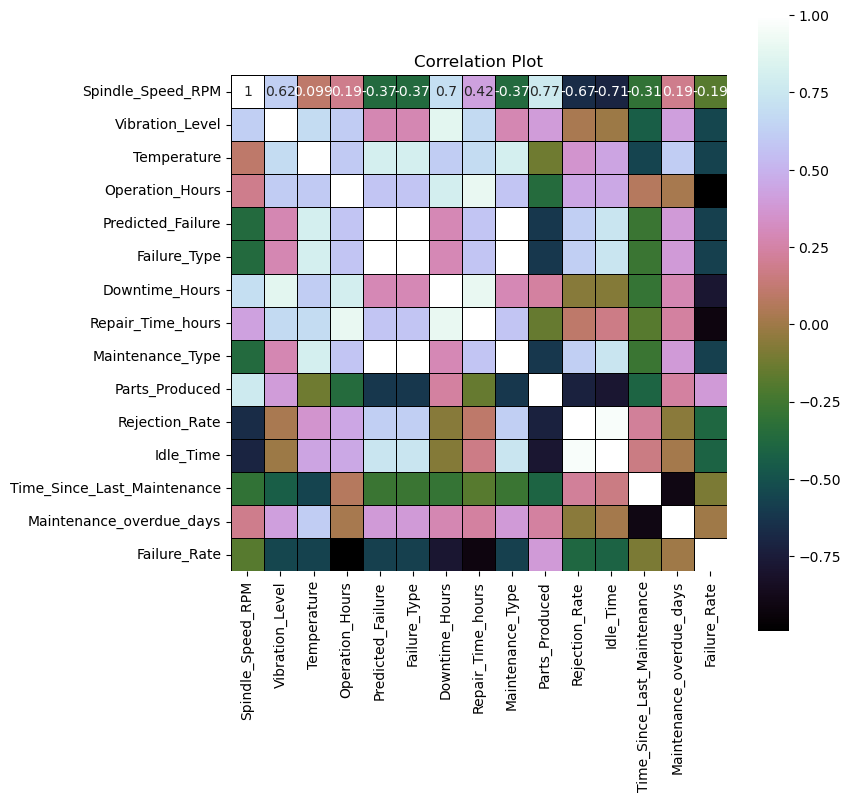

In [57]:

#Correlation Plot
corr=merged_data.corr()

#Set the width and hieght of the plot
plt.figure(figsize=(8,8))
#Plot using seaborn library
plt.title('Correlation Plot')
correlation_plot = sns.heatmap(corr, linewidths=0.4,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)


In [58]:
#correlation matrix
corr

,Spindle_Speed_RPM,Vibration_Level,Temperature,Operation_Hours,Predicted_Failure,Failure_Type,Downtime_Hours,Repair_Time_hours,Maintenance_Type,Parts_Produced,Rejection_Rate,Idle_Time,Time_Since_Last_Maintenance,Maintenance_overdue_days,Failure_Rate
Spindle_Speed_RPM,1.000000,0.622923,0.099161,0.187723,-0.366434,-0.366434,0.697257,0.420142,-0.366434,0.767175,-0.672424,-0.711844,-0.307207,0.190169,-0.189138
Vibration_Level,0.622923,1.000000,0.687056,0.605929,0.283089,0.283089,0.877002,0.677684,0.283089,0.395539,0.032513,-0.011808,-0.433539,0.412397,-0.549838
Temperature,0.099161,0.687056,1.000000,0.596777,0.808470,0.808470,0.615573,0.686059,0.808470,-0.122968,0.357283,0.434349,-0.562640,0.610979,-0.566319
Operation_Hours,0.187723,0.605929,0.596777,1.000000,0.577350,0.577350,0.800000,0.900000,0.577350,-0.358262,0.444806,0.452551,0.071299,0.025734,-0.992855
Predicted_Failure,-0.366434,0.283089,0.808470,0.577350,1.000000,1.000000,0.288675,0.577350,1.000000,-0.618255,0.625586,0.739305,-0.274431,0.390014,-0.577420
Failure_Type,-0.366434,0.283089,0.808470,0.577350,1.000000,1.000000,0.288675,0.577350,1.000000,-0.618255,0.625586,0.739305,-0.274431,0.390014,-0.577420
Downtime_Hours,0.697257,0.877002,0.615573,0.800000,0.288675,0.288675,1.000000,0.900000,0.288675,0.234248,-0.065831,-0.066854,-0.285197,0.283077,-0.787020
Repair_Time_hours,0.420142,0.677684,0.686059,0.900000,0.577350,0.577350,0.900000,1.000000,0.577350,-0.151572,0.103195,0.169707,-0.190132,0.231608,-0.920207
Maintenance_Type,-0.366434,0.283089,0.808470,0.577350,1.000000,1.000000,0.288675,0.577350,1.000000,-0.618255,0.625586,0.739305,-0.274431,0.390014,-0.577420
Parts_Produced,0.767175,0.395539,-0.122968,-0.358262,-0.618255,-0.618255,0.234248,-0.151572,-0.618255,1.000000,-0.721142,-0.789624,-0.404398,0.233023,0.389709


In [59]:
# # #saving output results for Dashboard
# # merged_data.to_csv("predective_model_merged_data.csv",index=False)
# merged_data.shape
# merged_data.to_csv("predective_XXXXXX.csv",index=False)

In [60]:
df=merged_data.copy()
data=df.copy()
data.columns

Index(['Spindle_Speed_RPM', 'Vibration_Level', 'Temperature',
       'Operation_Hours', 'Machine_Status', 'Predicted_Failure',
       'Failure_Type', 'Downtime_Hours', 'Repair_Time_hours',
       'Maintenance_Type', 'Parts_Produced', 'Production_Quality',
       'Rejection_Rate', 'Idle_Time', 'Time_Since_Last_Maintenance',
       'Maintenance_overdue_days', 'Failure_Rate'],
      dtype='object')

### Dimensionality Reduction using Principal Component Analysis

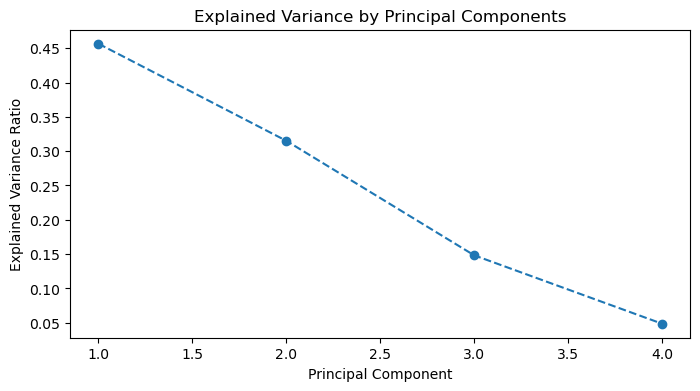

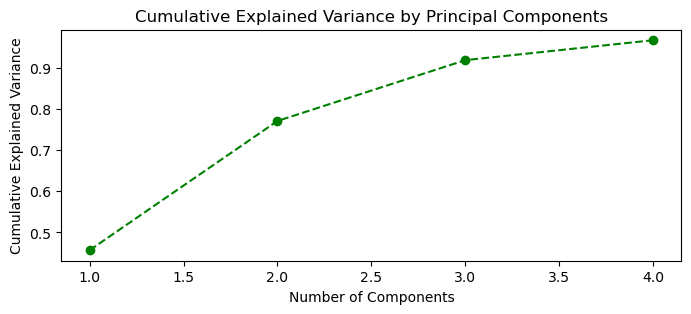

Number of components after PCA: 4


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Separate features and target
X = data.drop(columns=['Predicted_Failure'])
y = data['Predicted_Failure']

# Standardize the data (necessary for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio for each component to understand the variance captured
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# Display the cumulative explained variance to see how many components cover the desired variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 3))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()


# Transform the dataset to the PCA space for further analysis or modeling
pca_data = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Check how many components were chosen
print("Number of components after PCA:", pca.n_components_)



Almost 95% variance is explained by just 4 variables. So, we will reduce the components to 4

In [64]:
print(pca_data.shape)
pca_data.head()

(35, 4)


,PC1,PC2,PC3,PC4
0,-2.436501,0.010285,-2.379446,-0.613215
1,0.046883,-3.449310,0.277845,-0.720256
2,-3.512581,0.659565,1.426026,0.930570
3,3.611495,-1.045295,-0.996951,0.947287
4,1.716330,3.554702,0.566280,-0.576904


## MODELLING

### Model Selection and Training:

- Random Forest: Works well with structured data and helps with feature importance.<br>
- Support Vector Machine (SVM): Effective for binary classification.<br>
- LSTM: If using time-series sequences, reshape your data to suit LSTM input requirements<br>

### ***Random Forest:***

In [109]:
# # Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



### Support Vector Machine (SVM)

In [113]:
# Support Vector Machine (SVM): Effective for binary classification.

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create the model (using linear kernel for simplicity)
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



## DASHBOARD

In [72]:

# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# import plotly.express as px

# # Initialize the Dash app
# app = dash.Dash(__name__)

# # Define the layout of the dashboard
# app.layout = html.Div([
#     html.H1("Predictive Maintenance Dashboard", style={'text-align': 'center'}),
    
#     # Dropdown for selecting a feature to display
#     dcc.Dropdown(
#         id='feature-dropdown',
#         options=[{'label': col, 'value': col} for col in df.columns],
#         value=df.columns[0],  # default value
#         style={'width': '50%', 'margin': '0 auto'}
#     ),
    
#     # Graph to display feature distribution
#     dcc.Graph(id='feature-graph'),
    
#     # Graph to display predictive model output
#     dcc.Graph(id='prediction-graph')
# ])

# # Callback for updating the graph based on selected feature
# @app.callback(
#     Output('feature-graph', 'figure'),
#     [Input('feature-dropdown', 'value')]
# )
# def update_graph(selected_feature):
#     fig = px.histogram(df, x=selected_feature)
#     fig.update_layout(title=f'Distribution of {selected_feature}')
#     return fig

# # Callback for prediction model (example: showing a prediction vs. actual plot)
# @app.callback(
#     Output('prediction-graph', 'figure'),
#     [Input('feature-dropdown', 'value')]
# )
# def prediction_graph(selected_feature):
#     # Assuming you have a predictive model and some results (for illustration)
#     # You would replace this with your actual predictive maintenance model results
#     predicted = df[selected_feature] * 1.2  # Placeholder for prediction logic
#     actual = df[selected_feature]  # Placeholder for actual values
    
#     fig = px.scatter(x=actual, y=predicted, labels={'x': 'Actual', 'y': 'Predicted'})
#     fig.update_layout(title='Prediction vs Actual')
#     return fig

# # Run the app
# if __name__ == '__main__':
#     app.run_server(debug=True, use_reloader=False)  # `use_reloader=False` for Jupyter notebooks


## LSTM

In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

In [ ]:
### Prepare Data for LSTM

In [145]:
# feature and target separation
features = X.values
target = y.values

# Normalize features (optional but recommended)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Reshape into sequences
sequence_length = 10  # Number of timesteps
X, y = [], []
for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i:i+sequence_length])
    y.append(target[i+sequence_length])

X, y = np.array(X), np.array(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:
## Build and Compile the LSTM Model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Adjust activation based on target range
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [149]:
### Train the model

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 0.2514 - mae: 0.5014 - val_loss: 0.2508 - val_mae: 0.5008
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - loss: 0.2524 - mae: 0.5024 - val_loss: 0.2519 - val_mae: 0.5019
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.2490 - mae: 0.4990 - val_loss: 0.2528 - val_mae: 0.5027
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 0.2513 - mae: 0.5012 - val_loss: 0.2531 - val_mae: 0.5031
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 0.2514 - mae: 0.5014 - val_loss: 0.2528 - val_mae: 0.5027
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 0.2489 - mae: 0.4988 - val_loss: 0.2527 - val_mae: 0.5026


In [150]:
### Evaluate the Model

# Evaluate on test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Predictions and metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}, Mean Absolute Error: {mae:.4f}")


Test Loss: 0.2509, Test MAE: 0.5009
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Mean Squared Error: 0.2509, Mean Absolute Error: 0.5009


In [153]:
##  Save the Model for Deployment

# Save the model
model.save('lstm_predictive_maintenance.h5')

# Save the scaler (if used)
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [155]:
## Deployment Preparation

from tensorflow.keras.models import load_model

# Load model
loaded_model = load_model('lstm_predictive_maintenance.h5')

# Load scaler
scaler = joblib.load('scaler.pkl')

# Example prediction
sample_data = X_test[0:1]  # Replace with real-time data
prediction = loaded_model.predict(sample_data)
print(f"Predicted Failure Probability: {prediction[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Failure Probability: 0.4980


# Conclusion
## ***The CNC machine data analysis highlights:***

1. Machine Health: 50% of machines are at risk of failure, requiring immediate attention. High vibration and temperature levels (e.g., CNC019) are key indicators of wear and tear.
2. Maintenance: Current schedules are effective but can be refined to optimize downtime.
3. Production Quality: High-quality output (71%) with low rejection rates (2.5%) reflects good operational parameters.
4. Downtime: Machines with high downtime (e.g., CNC010, CNC019) need prioritized repairs and predictive analysis.
5. Failure Rates: Machines like CNC002 and CNC017 show higher failure rates despite maintenance, warranting deeper investigation.

***   
## ***Recommendations:*** <br>
### Focus on predictive maintenance, real-time monitoring with IoT sensors, and reducing idle hours to enhance efficiency, minimize downtime, and optimize costs.